In [1]:
import pandas as pd
import numpy as np
import src.utils as ut
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout
import fastdataing as fd
print(tf.__version__)


2.15.0


### Load the dataset

In [2]:
df = pd.read_csv("./data/InduceTime_PVP.csv")
df

,Unnamed: 0,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),H2S(%),MW,LogP,NumHDonors,NumHAcceptors,N2(%),CO2(%),Induction delay time (min)
0,0,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,17.6
1,1,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.2
2,2,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.8
3,3,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,26.9
4,4,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5,PVP,0.5,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,59.4
65,6,PVP,0.7,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,61.7
66,7,PVP,1.0,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,68.5
67,8,PVP,1.5,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,74.9


### Feature engineering

In [3]:
df.columns

Index(['Unnamed: 0', 'Inhibitors', 'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)',
       'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)', 'iC4(%)', 'H2S(%)', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'N2(%)', 'CO2(%)',
       'Induction delay time (min)'],
      dtype='object')

In [5]:
def data_process(df):
    labelencoder_B = LabelEncoder()
    df["Inhibitors"] = labelencoder_B.fit_transform(df["Inhibitors"])

    X = df[["Inhibitors",'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)',
       'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)', 'iC4(%)','H2S(%)', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'N2(%)', 'CO2(%)'
       ]].values
    y = df['Induction delay time (min)'].values
    return X, y

In [7]:
X,y = data_process(df)
X.shape

(69, 16)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=22)

In [9]:
X_train.shape

(55, 16)

In [10]:
transfer = MinMaxScaler() # # Min-Max标准化
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)
X_train.shape

(55, 16)

### Model and train

In [11]:
tf.keras.backend.clear_session()
initializer = tf.initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=X_train.shape[1:],kernel_initializer=initializer))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1))
# optimizer=tf.keras.optimizers.Adam()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=X_train,y=y_train,epochs=200,
                batch_size=10,validation_split=0.2)


Epoch 1/200

5/5 [==============================] - 1s 47ms/step - loss: 88.6469 - val_loss: 60.6690
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 87.4316 - val_loss: 58.0250
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 82.1256 - val_loss: 47.4693
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 62.3681 - val_loss: 28.0475
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 37.3929 - val_loss: 37.2589
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 39.8341 - val_loss: 25.2168
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 32.6198 - val_loss: 19.6337
Epoch 8/200
5/5 [==============================] - 0s 10ms/step - loss: 29.9124 - val_loss: 24.5272
Epoch 9/200
5/5 [==============================] - 0s 10ms/step - loss: 27.4684 - val_loss: 32.6776
Epoch 10/200
5/5 [==============================] - 0s 9ms/step - loss: 28.1736 - val_loss: 24.074


>>> add a fig successfully !



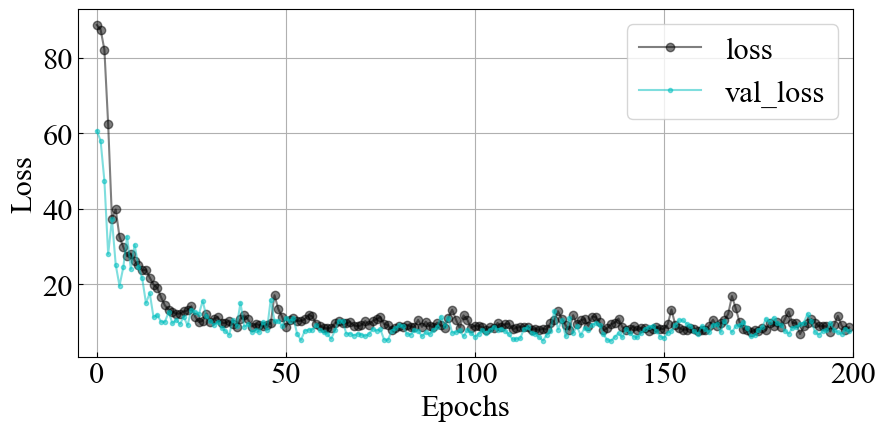

In [12]:
loss = Model.history['loss']
val_loss = Model.history['val_loss']
epochs = len(loss)
fig = fd.add_fig()
ax = fd.add_ax(fig)

ax.set_xlim((-5, 200))
ax.plot(range(epochs), loss, color = 'k', marker = 'o', label = 'loss',alpha=0.5)
ax.plot(range(epochs), val_loss, color = 'c', marker = '.', label = 'val_loss',alpha=0.5)
ax.legend(loc = 'best')
ax.grid()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.gca().set_aspect("equal", adjustable="box")
# plt.savefig("CNN_Loss.png", dpi=600, bbox_inches='tight')
plt.show()

### Save and load model

In [13]:
filepath = './data/PVP_DeePL.model'
save_model(model, filepath, save_format='h5')
!ls ./data/PVP_DeePL*

C:\Users\59631\AppData\Local\Temp\ipykernel_19896\3948649734.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, filepath, save_format='h5')
'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [14]:
model = load_model(filepath)

### Predict

In [15]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train set R^2: %.2f" % r2_score(y_train, y_pred_train))
print("Train MAE score: %.2f" % mean_absolute_error(y_train, y_pred_train))
print("Train RMSE score: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))

print("Test set R^2: %.2f" % r2_score(y_test, y_pred_test))
print("Test MAE score: %.2f" % mean_absolute_error(y_test, y_pred_test))
print("Test RMSE score: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

1/1 [==============================] - 0s 24ms/step
Train set R^2: 0.94
Train MAE score: 7.63
Train RMSE score: 11.52
Test set R^2: 0.76
Test MAE score: 20.57
Test RMSE score: 24.63


In [ ]:
fig = fd.add_fig()
ax = fd.add_ax(fig)
fd.plot_scatter(ax,y_train, y_pred_train, color='#1f77b4', marker='o', s = 36, edgecolors='k', linewidths = 2)
fd.plot_scatter(ax,y_test, y_pred_test, color='#ff7f0e', marker='o', s = 36, edgecolors='k', linewidths = 2) 
ax.set_xlabel("Experiment",fontname="Times New Roman", fontsize=22)
ax.set_ylabel("Prediction",fontname="Times New Roman", fontsize=22)
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = -300, 300
ax.set_xlim([-0, 210])
ax.set_ylim([-0, 210])
# plt.gca().set_aspect("equal", adjustable="box")
ax.plot(np.arange(x_start, x_end, 0.01*length),np.arange(x_start, x_end, 0.01*length), '#d62728')
ax.text(70, 40, "Train $R^2={:.2f}$, MAE={:.2f}, RMSE={:.2f}".format(round(r2_score(y_train, y_pred_train),2),round(mean_absolute_error(y_train, y_pred_train),2), round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2)),{'color':'#1f77b4'}, fontname="Times New Roman", fontsize=20, fontweight='normal')
ax.text(70, 20, "Test  $R^2 ={:.2f}$, MAE={:.2f}, RMSE={:.2f}".format(r2_score(y_test, y_pred_test),mean_absolute_error(y_test, y_pred_test),np.sqrt(mean_squared_error(y_test, y_pred_test))),{'color':'#ff7f0e'}, fontname="Times New Roman", fontsize=20, fontweight='normal')

plt.title('DNN',fontname="Times New Roman", fontsize=22)
plt.savefig("./imgs/DNN.png", dpi=300, bbox_inches='tight') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



>>> add a fig successfully !

